In [1]:
# 误差可视化

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ErrorbarContainer object of 3 artists>

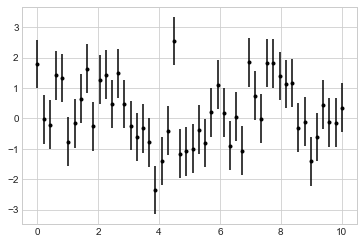

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

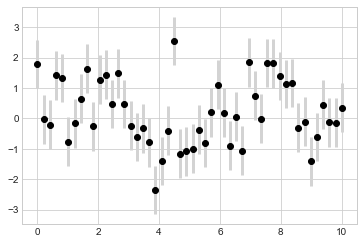

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

In [4]:
# 连续误差

from sklearn.gaussian_process import GaussianProcess
# 定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# 计算高斯过程拟合结果
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma~95%置信区间

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\u

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.p

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.p

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.p

(0, 10)

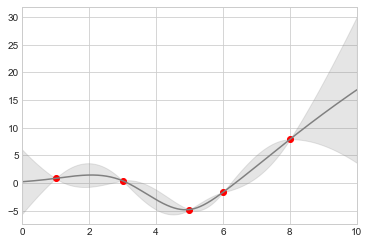

In [5]:
# 将结果可视化
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10)

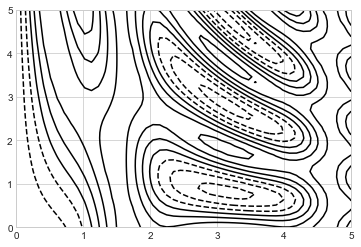

In [7]:
# 密度图与等高线图

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black')

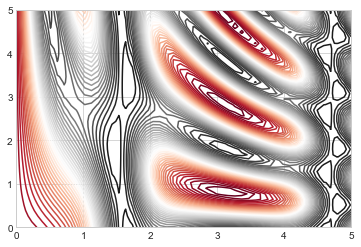

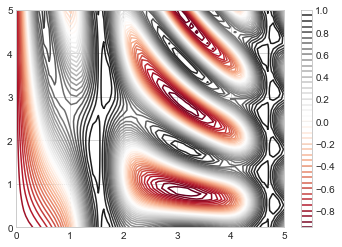

In [14]:
plt.contour(X, Y, Z, 40, cmap='RdGy')
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

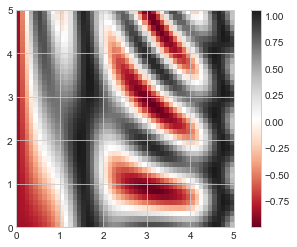

In [15]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

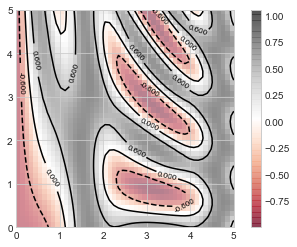

In [16]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar()